<a href="https://colab.research.google.com/github/christophergarcia89/ds4b/blob/main/Operations_Department_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA Nº 1: ENTENDER EL PLANTEAMIENTO DEL PROBLEMA Y EL CASO DE NEGOCIO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Classifying disease using Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=19BuQ5m0xZWC7vQN4jX9lukmJ4aE0EkL8)

![alt text](https://drive.google.com/uc?id=10tbeSkGZ0xdHtqTGhYwHhb9PPURw0BfD)

# TAREA Nº 2: IMPORTAR LAS BIBLIOTECAS Y EL CONJUNTO DE DATOS

In [3]:
!git clone https://github.com/christophergarcia89/ds4b.git

Cloning into 'ds4b'...
remote: Enumerating objects: 13214, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 13214 (delta 24), reused 0 (delta 0), pack-reused 13175
Receiving objects: 100% (13214/13214), 1.31 GiB | 41.80 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Checking out files: 100% (13166/13166), done.


In [4]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Specify training data directory
#XRay_Directory = '/content/drive/My Drive/Colab Notebooks/Chest_X_Ray/train'
XRay_Directory = '/content/ds4b/4. Operations Department/Dataset'

In [8]:
# Listar las carpetas del directorio
os.listdir(XRay_Directory)

['0', '3', '1', '2']

In [9]:
# Utilizar el generador de imágenes para generar datos de imágenes tensoriales y normalizarlos
# Utilizar el 20% de los datos para la validación cruzada  
image_generator = ImageDataGenerator(rescale = 1./255, validation_split= 0.2)

In [10]:
# Generar lotes de 40 imágenes
# El número total de imágenes es 133*4 = 532 imágenes
# El entrenamiento es de 428 (80%) y la validación es de 104 (20%)
# Realiza el barajado y el redimensionamiento de la imagen
#shuffle->aleatorizar|target_size->tamaño de las imagenes|class_mode->problema de clasificación|subset->conjunto de entrenamiento
train_generator = image_generator.flow_from_directory(batch_size = 40, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="training")


Found 428 images belonging to 4 classes.


In [11]:
#Set de datos para prueba
validation_generator = image_generator.flow_from_directory(batch_size = 40, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="validation")


Found 104 images belonging to 4 classes.


In [12]:
# Generar un lote de 40 imágenes y etiquetas
train_images, train_labels = next(train_generator)

In [13]:
train_images.shape

(40, 256, 256, 3)

In [14]:
train_labels.shape

(40, 4)

In [15]:
train_labels

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]],

In [16]:
# Etiquetas Traductor 
label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia', 3 : 'Bacterial Pneumonia'}

# TAREA Nº 3: VISUALIZAR EL CONJUNTO DE DATOS

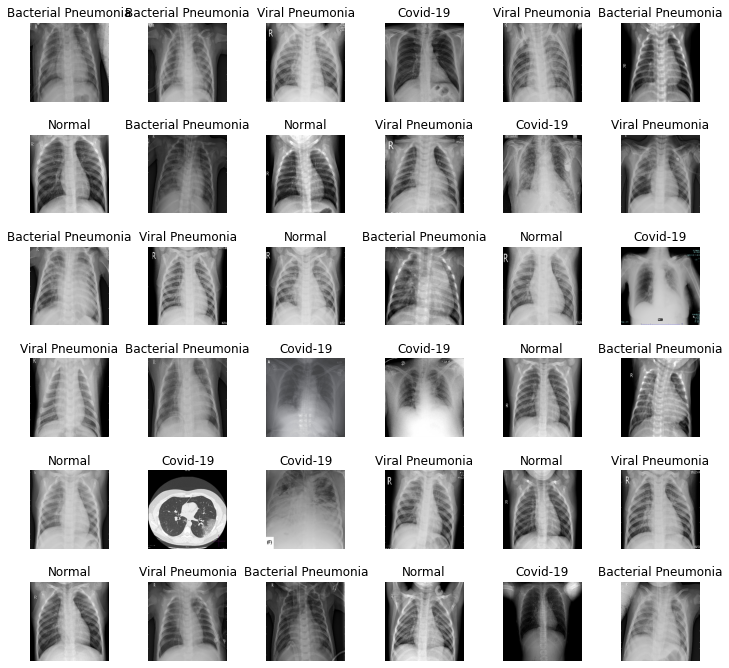

In [17]:
# Crear una cuadrícula de 36 imágenes junto con sus correspondientes etiquetas
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (12, 12))
#Para ajustar en una matriz y las imagenes se acomoden
axes = axes.ravel()

for i in np.arange(0, L*W):
    #Mostrar imagenes
    axes[i].imshow(train_images[i])
    #Etiquetar las imagenes
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    #Eliminar los ejes
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)    

# TAREA Nº 4: ENTENDER LA TEORÍA Y LA INTUICIÓN QUE HAY DETRÁS DE LAS REDES NEURONALES PROFUNDAS

![alt text](https://drive.google.com/uc?id=176TJGdJtNZmX4J5QyeI8W_YS5f1gg5VS)

![alt text](https://drive.google.com/uc?id=1340UvqbXc-sy6cIuVg7ZbOwcga2JxfkP)

![alt text](https://drive.google.com/uc?id=1hngDlUf9JnwUhPII-Ah7KTtcvoeTI9m8)

![alt text](https://drive.google.com/uc?id=1nt8iX7H2LEhaWgGCi_NIb05DMQEoJVfI)

# TAREA Nº 5: COMPRENDER LA TEORÍA Y LA INTUICIÓN DEL APRENDIZAJE POR TRANSFERENCIA

![alt text](https://drive.google.com/uc?id=1Wnti2DSmA2qMRsgkD7Z_MJkmed0bJZTN)

![alt text](https://drive.google.com/uc?id=1Chdq0gdnHGYDDb50pMMtcTOZMr0u37Iz)

![alt text](https://drive.google.com/uc?id=14niGb232X6l8OD1dMT4a_u3fjh_jKuMS)

![alt text](https://drive.google.com/uc?id=1dye4zWALCDu8a1a-58HfZk4On4nVuizV)

# TAREA Nº 6: IMPORTAR EL MODELO CON LOS PESOS PREENTRENADOS

In [18]:
#Red neuronal base
#include_top = False -> no quiero incluir la entrada a la red neuronal
#input_tensor = Input(shape=(256,256,3))-> entrada de 256x256 por 3 canales de colores
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256,256,3)))

94773248/94765736 [==============================] - 1s 0us/step


In [19]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [20]:
#congelación del modelo hasta la última etapa - 4 y reentrenamiento etapa -5 

for layer in basemodel.layers[:-10]:
  layers.trainable = False

In [21]:
basemodel.layers[:-10]

# TAREA Nº 7: CONSTRUIR Y ENTRENAR EL MODELO DE APRENDIZAJE PROFUNDO

In [22]:
#La salida del modelo de base, será la cabecera del nuevo modelo
headmodel = basemodel.output
#conv5_block3_out (Activation)   (None, 8, 8, 2048)   0           conv5_block3_add[0][0]  
#Capa de AveragePooling para reducir la salida de 8x8
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
#Capa con 256 neuronas
headmodel = Dense(256, activation = "relu")(headmodel)
#Overfitting, se reduce y se elimina el 30% de reuronas con la técnica de dropout
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu")(headmodel)
headmodel = Dropout(0.2)(headmodel)
#Salida para la clasificación de las categorias [son 4]
headmodel = Dense(4, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [23]:
#optimizer=optimizers.RMSprop->Maximizar el ratio de acierto
model.compile(loss = 'categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate = 1e-4, decay = 1e-6), metrics= ["accuracy"])

In [25]:
#PARADA TEMPRANA
# usando una parada temprana para salir del entrenamiento si la pérdida de validación no disminuye incluso después de ciertas épocas (paciencia)
#verbose=1 -> muestre por pantalla | patience -> iteraciones
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# guardar el mejor modelo con menor pérdida de validación
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [26]:
train_generator = image_generator.flow_from_directory(batch_size = 4, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="training")
val_generator = image_generator.flow_from_directory(batch_size = 4, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="validation")

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [27]:
history = model.fit_generator(train_generator, steps_per_epoch= train_generator.n // 4, epochs = 10, validation_data= val_generator, validation_steps= val_generator.n // 4, callbacks=[checkpointer, earlystopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
107/107 [==============================] - 55s 129ms/step - loss: 0.8585 - accuracy: 0.6822 - val_loss: 4.1344 - val_accuracy: 0.2500

Epoch 00001: val_loss improved from inf to 4.13441, saving model to weights.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
107/107 [==============================] - 13s 119ms/step - loss: 0.4605 - accuracy: 0.8692 - val_loss: 12.2848 - val_accuracy: 0.2500

Epoch 00002: val_loss did not improve from 4.13441
Epoch 3/10
107/107 [==============================] - 13s 119ms/step - loss: 0.2552 - accuracy: 0.9089 - val_loss: 50.7247 - val_accuracy: 0.2500

Epoch 00003: val_loss did not improve from 4.13441
Epoch 4/10
107/107 [==============================] - 13s 119ms/step - loss: 0.1867 - accuracy: 0.9322 - val_loss: 16.7963 - val_accuracy: 0.3173

Epoch 00004: val_loss did not improve from 4.13441
Epoch 5/10
107/107 [==============================] - 13s 119ms/step - loss: 0.1957 - accuracy: 0.9439 - val_loss: 7.5984 - val_accuracy: 0.3365

Epoch 00005: val_loss did not improve from 4.13441
Epoch 6/10
107/107 [==============================] - 13s 120ms/step - loss: 0.1504 - accuracy: 0.9556 - val_loss: 113.6631 - val_accuracy: 0.2500

Epoch 00006: val_loss did not improve from 4.13441
Epoch 7/10

# TAREA #8: EVALUAR EL MODELO DE APRENDIZAJE PROFUNDO ENTRENADO

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

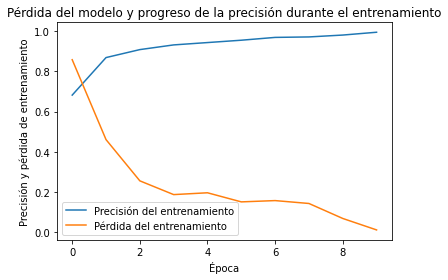

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Pérdida del modelo y progreso de la precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión y pérdida de entrenamiento')
plt.legend(['Precisión del entrenamiento', 'Pérdida del entrenamiento'])

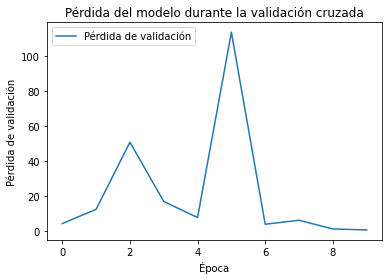

In [30]:
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo durante la validación cruzada')
plt.xlabel('Época')
plt.ylabel('Pérdida de validación')
plt.legend(['Pérdida de validación'])

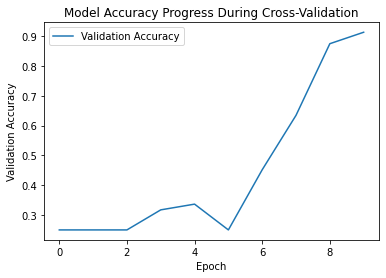

In [31]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

In [32]:
#test_directory = '/content/drive/My Drive/Colab Notebooks/Chest_X_Ray/Test'

test_directory = '/content/ds4b/4. Operations Department/Test'

In [33]:
#Fase de test
test_gen = ImageDataGenerator(rescale = 1./255)

test_generator = test_gen.flow_from_directory(batch_size = 40, directory= test_directory, shuffle= True, target_size=(256,256), class_mode= 'categorical')

evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

Found 40 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


10/10 [==============================] - 2s 4ms/step - loss: 1.2850 - accuracy: 0.8250
Accuracy Test : 0.824999988079071


In [34]:
#Generar matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory,str(i))):
    img= cv2.imread(os.path.join(test_directory,str(i),item))
    img = cv2.resize(img,(256,256))
    image.append(img)
    img = img / 255
    img = img.reshape(-1,256,256,3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

In [35]:
len(original)

40

In [ ]:
#Mostrar la predicción v/s original
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.825


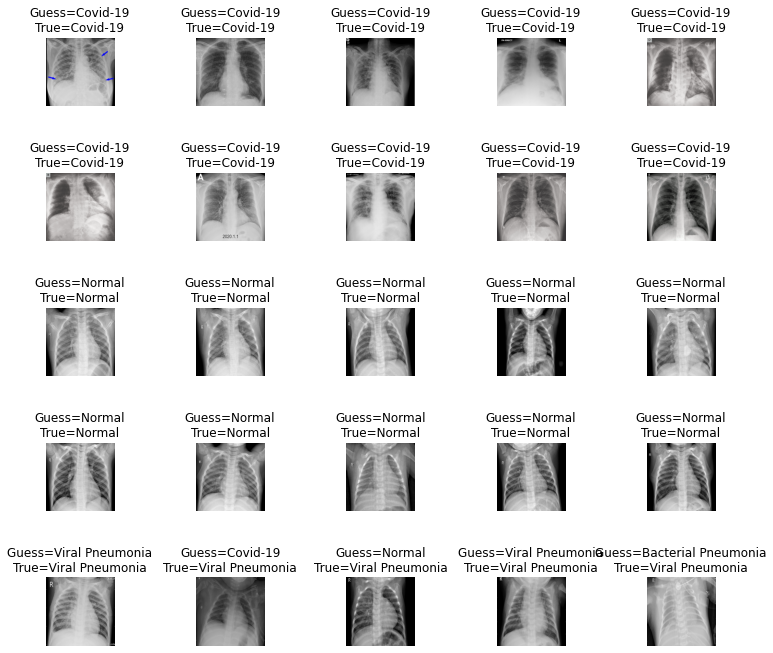

In [36]:
#Generar matriz para mostrar las predicciones
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2) 

In [37]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.67      1.00      0.80        10
           2       1.00      0.50      0.67        10
           3       0.89      0.80      0.84        10

    accuracy                           0.82        40
   macro avg       0.87      0.82      0.82        40
weighted avg       0.87      0.82      0.82        40



Text(0.5, 1.0, 'Confusion_matrix')

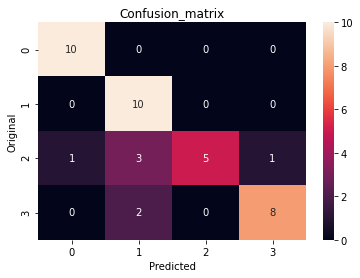

In [38]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS